#**1. IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
import keras
import seaborn as sns
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
%matplotlib inline

#**2. LOADING DATASET**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/FDAI/dataset.csv')
df.head(5)

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,Class
0,1,283,333.0,363.574744,3.0,%=0.05,Lean
1,1,283,333.0,362.349517,3.0,%=0.1,Nominal
2,1,283,333.0,361.216941,3.0,%=0.15,ExcessAir
3,1,283,333.0,360.166890,3.0,%=0.20,ExcessAir
4,1,283,333.0,359.190662,3.0,%=0.25,ExcessAir


#**3. DATASET ANALYSIS**

##**3.1 Rows and Columns**

In [ ]:
#Determining Number of Rows and Columns of the dataset
print("Shape of the dataset is: ",df.shape)

Shape of the dataset is:  (27280, 7)


##**3.2 Data-type and Null Values**

In [ ]:





#Determining the data-type and NULL Values of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27280 entries, 0 to 27279
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fuel_Mdot   27280 non-null  int64  
 1   Tair        27280 non-null  int64  
 2   Treturn     27280 non-null  float64
 3   Tsupply     27280 non-null  float64
 4   Water_Mdot  27280 non-null  float64
 5   Condition   27280 non-null  object 
 6   Class       27280 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


##**3.3 Unique Classes**

In [ ]:
#Determining types of unique faults in the dataset
print("Number of unique classes: ",len(pd.unique(df['Class'])))
print("\nTypes of classes: ",df.Class.unique())

Number of unique classes:  5

Types of classes:  ['Lean' 'Nominal' 'ExcessAir' 'Fouling' 'Scaling']


In [ ]:
#Determining the percentage of each class in the dataset
class_rate = df.Class.value_counts() / 27280
class_rate*100

Scaling      32.258065
Fouling      32.258065
ExcessAir    25.806452
Nominal       6.451613
Lean          3.225806
Name: Class, dtype: float64

([<matplotlib.patches.Wedge at 0x7fe3a5412ed0>,
 [Text(0.5818604395536556, 0.933508665670773, 'Scaling'),
  Text(-1.0943562456479174, 0.111285253342008, 'Fouling'),
  Text(0.16657039762645068, -1.0873151809087218, 'ExcessAir'),
  Text(1.0108535167938453, -0.43379161769853913, 'Nominal'),
  Text(1.0943562339262245, -0.11128536861066199, 'Lean')])

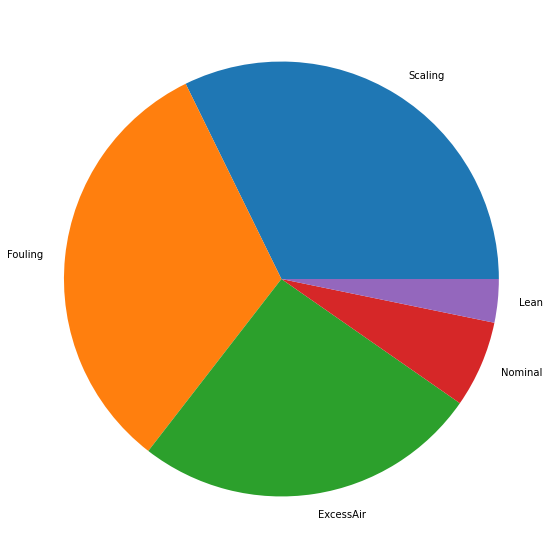

In [ ]:
plt.figure(figsize=(15,10))
data = np.array([32.258065, 32.258065, 25.806452, 6.451613, 3.225806])
class_unique = ['Scaling' ,'Fouling', 'ExcessAir' ,'Nominal' ,'Lean']

plt.pie( data , labels = class_unique)


##**3.4 Unique Conditions**

In [ ]:
#Determing the types of unique conditions for the occurence of faults
print("Number of conditions: ",len(pd.unique(df['Condition'])))
print("\nTypes of conditions: \n",df.Condition.unique())

Number of conditions:  31

Types of conditions: 
 ['%=0.05' '%=0.1' '%=0.15' '%=0.20' '%=0.25' '%=0.3' '%=0.35' '%=0.40'
 '%=0.45' '%=0.50' 'F = 0.01' 'F = 0.06' 'F = 0.11' 'F = 0.16' 'F = 0.21'
 'F = 0.26' 'F = 0.31' 'F = 0.36' 'F = 0.41' 'F = 0.46' 'S = 0.01'
 'S = 0.06' 'S = 0.11' 'S = 0.16' 'S = 0.21' 'S = 0.26' 'S = 0.31'
 'S = 0.36' 'S = 0.41' 'S = 0.46' 'Nominal']


In [ ]:
#Determining the percentage of each condition in the dataset
class_rate = df.Condition.value_counts() / 27280
class_rate*100

F = 0.36    3.225806
S = 0.01    3.225806
%=0.35      3.225806
F = 0.46    3.225806
S = 0.06    3.225806
F = 0.16    3.225806
S = 0.46    3.225806
F = 0.41    3.225806
Nominal     3.225806
S = 0.36    3.225806
F = 0.21    3.225806
%=0.15      3.225806
F = 0.01    3.225806
%=0.40      3.225806
S = 0.26    3.225806
S = 0.21    3.225806
S = 0.31    3.225806
%=0.3       3.225806
%=0.45      3.225806
S = 0.16    3.225806
F = 0.06    3.225806
F = 0.26    3.225806
F = 0.31    3.225806
%=0.05      3.225806
%=0.50      3.225806
%=0.25      3.225806
F = 0.11    3.225806
S = 0.11    3.225806
%=0.1       3.225806
%=0.20      3.225806
S = 0.41    3.225806
Name: Condition, dtype: float64

#**4. DATA VISUALIZATION**

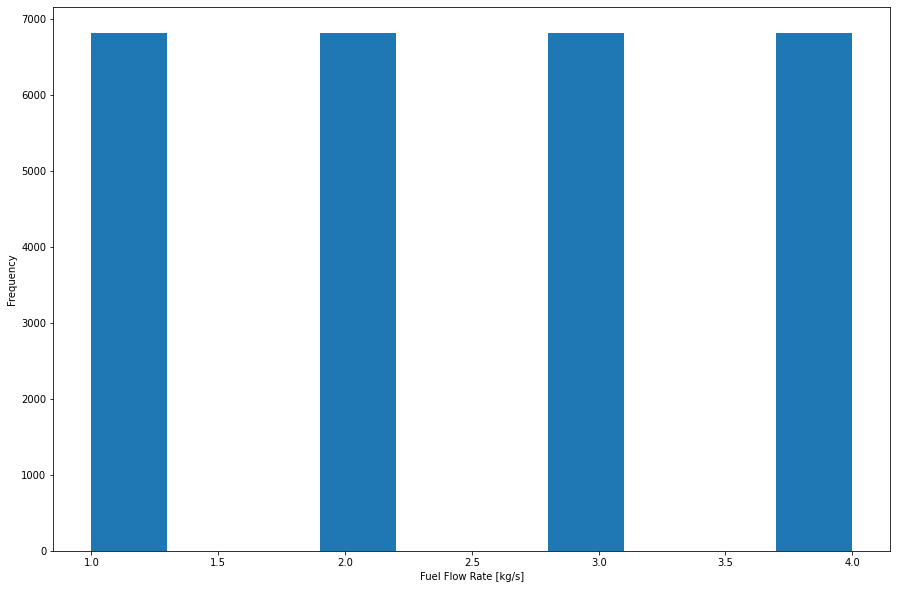

In [ ]:

plt.figure(figsize=(15,10))

plt.xlabel("Fuel Flow Rate [kg/s]")
df['Fuel_Mdot'].plot.hist()

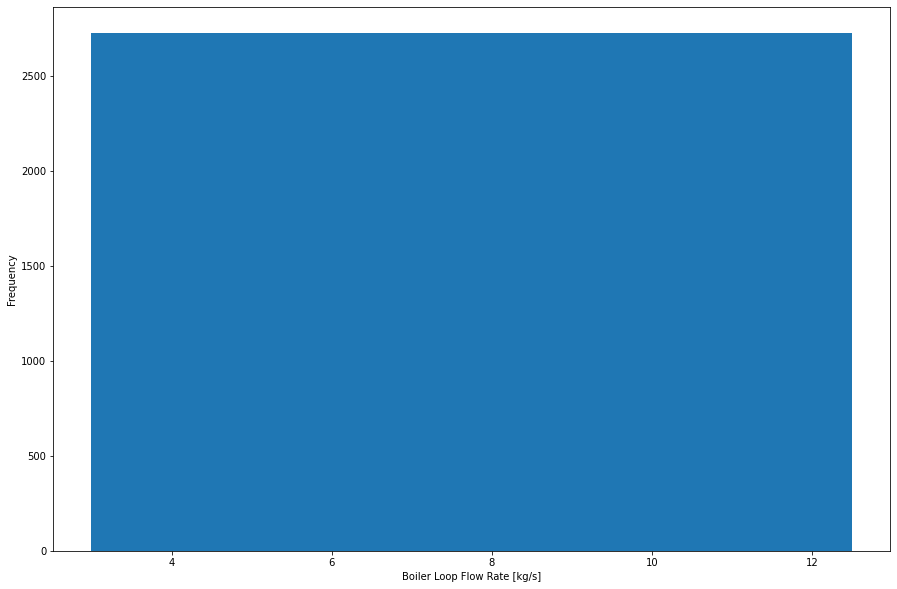

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Boiler Loop Flow Rate [kg/s]")
df['Water_Mdot'].plot.hist()

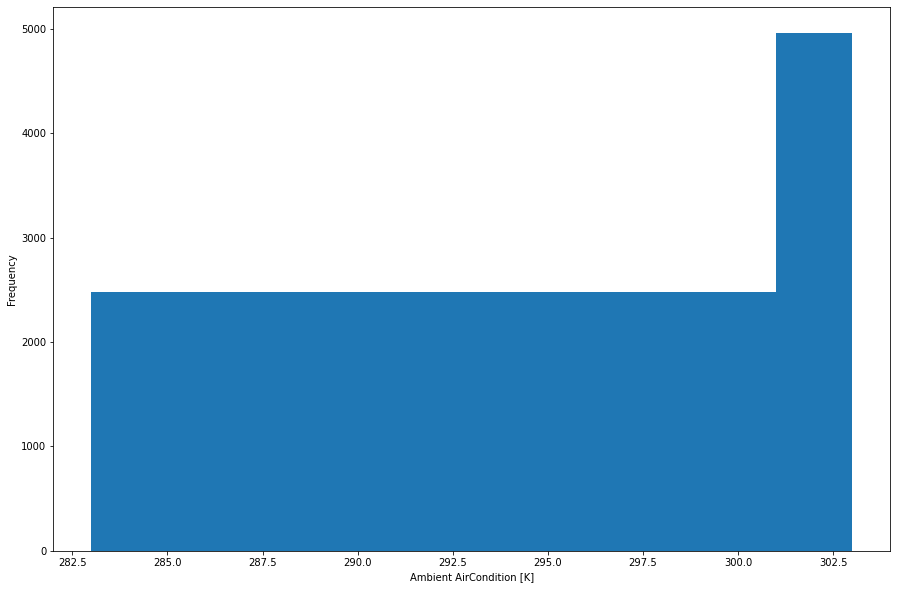

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Ambient AirCondition [K]")
df['Tair'].plot.hist()

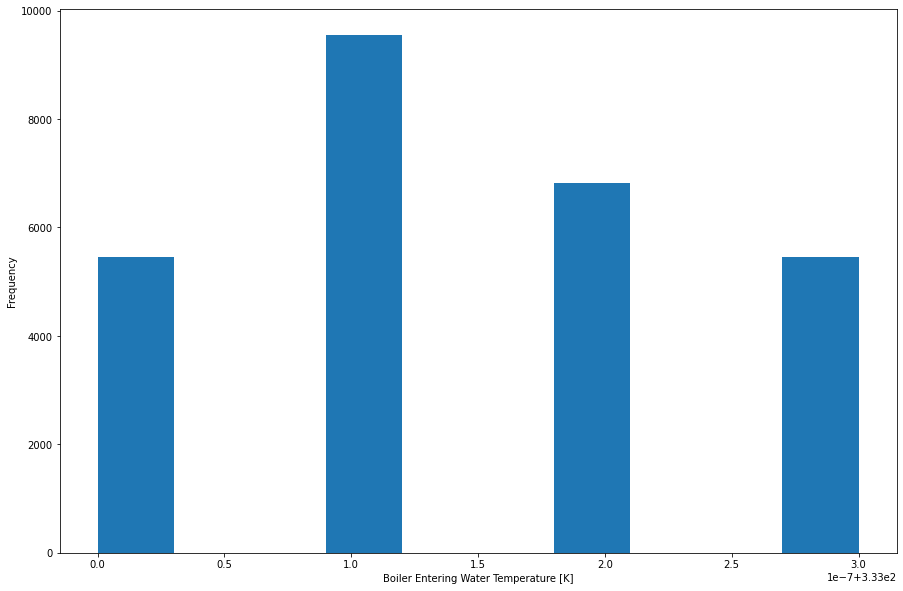

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Boiler Entering Water Temperature [K]")
df['Treturn'].plot.hist()

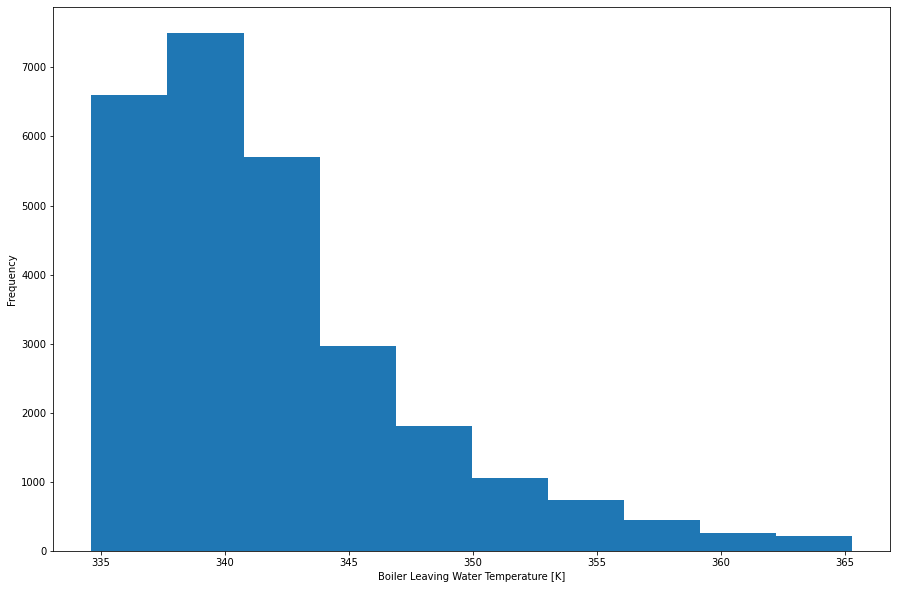

In [ ]:
plt.figure(figsize=(15,10))
plt.xlabel("Boiler Leaving Water Temperature [K]")
df['Tsupply'].plot.hist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


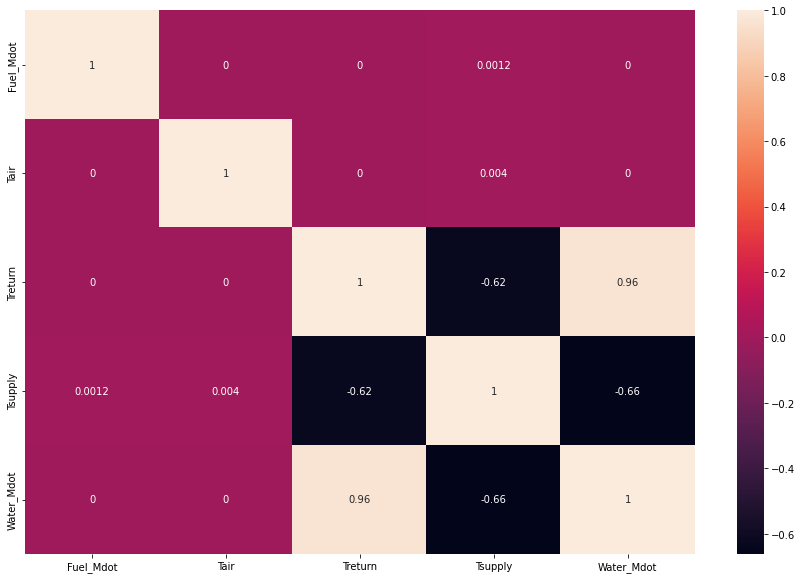

In [ ]:
## Checking for correlation between different variables

import seaborn as sns
df_features =df[['Fuel_Mdot', 'Tair',	'Treturn',	'Tsupply',	'Water_Mdot']]
plt.figure(figsize = (15,10))
df_features_corr = df_features.corr()

c = df_features_corr.astype('float') / df_features_corr.sum(axis=1)[:, np.newaxis]
sns.heatmap(df_features_corr,annot=True)

**Observations from Correlation Matrix**

* There is a negative correlation between:
  * Treturn - Tsupply
  * Water_Mdot - Tsupply
  * ***Description: Variables are inversely proportional to each other***

* There is a positive correlation between:
  * Tsupply - Fuel_Mdot
  * Tsupply - Tair
  * Water_Mdot - Treturn
  * ***Description: Variables are proportional to each other***

* There is NO correlation between:
  * Water_Mdot - Fuel_Mdot
  * Water_Mdot - Tair
  * Tair - Fuel_Mdot
  * Treturn - Fuel_Mdot
  * Treturn - Tair
  * ***Description: The variables are independent of each other and has no predictive relationship***


#**5. DATA PREPROCESSING**

##**5.1 Processing of Categorical Variables**

##**5.1.1 Dummy Variable - Class**

In [ ]:
dummies = pd.get_dummies(df.Class)
merged = pd.concat([df,dummies],axis='columns')
df_pre_1 = merged.drop(['Class'], axis='columns')
df_pre_1.head(10)

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Condition,ExcessAir,Fouling,Lean,Nominal,Scaling
0,1,283,333.0,363.574744,3.0,%=0.05,0,0,1,0,0
1,1,283,333.0,362.349517,3.0,%=0.1,0,0,0,1,0
2,1,283,333.0,361.216941,3.0,%=0.15,1,0,0,0,0
3,1,283,333.0,360.166890,3.0,%=0.20,1,0,0,0,0
4,1,283,333.0,359.190662,3.0,%=0.25,1,0,0,0,0
5,1,283,333.0,358.280736,3.0,%=0.3,1,0,0,0,0
6,1,283,333.0,357.430579,3.0,%=0.35,1,0,0,0,0
7,1,283,333.0,356.634489,3.0,%=0.40,1,0,0,0,0
8,1,283,333.0,355.887468,3.0,%=0.45,1,0,0,0,0
9,1,283,333.0,355.185115,3.0,%=0.50,1,0,0,0,0


##**5.1.2 Dummy Variable - Condition**

In [ ]:
dummies = pd.get_dummies(df.Condition)
merged = pd.concat([df,dummies],axis='columns')
df_pre_2 = merged.drop(['Condition'], axis='columns')
df_pre_2.head(10)

,Fuel_Mdot,Tair,Treturn,Tsupply,Water_Mdot,Class,%=0.05,%=0.1,%=0.15,%=0.20,%=0.25,%=0.3,%=0.35,%=0.40,%=0.45,%=0.50,F = 0.01,F = 0.06,F = 0.11,F = 0.16,F = 0.21,F = 0.26,F = 0.31,F = 0.36,F = 0.41,F = 0.46,Nominal,S = 0.01,S = 0.06,S = 0.11,S = 0.16,S = 0.21,S = 0.26,S = 0.31,S = 0.36,S = 0.41,S = 0.46
0,1,283,333.0,363.574744,3.0,Lean,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,283,333.0,362.349517,3.0,Nominal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,283,333.0,361.216941,3.0,ExcessAir,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,283,333.0,360.166890,3.0,ExcessAir,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,283,333.0,359.190662,3.0,ExcessAir,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,283,333.0,358.280736,3.0,ExcessAir,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,283,333.0,357.430579,3.0,ExcessAir,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,283,333.0,356.634489,3.0,ExcessAir,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,283,333.0,355.887468,3.0,ExcessAir,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,283,333.0,355.185115,3.0,ExcessAir,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#**6. Model Training and Classification**
##**Target Variable: Class**

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

##**6.1 Via Decision Tree Classifier**
###**Target Variable: Class**

##**6.1.1 Model Accuracy**

In [ ]:
#split dataset in features and target variable
feature_cols = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X = df[feature_cols] # Features
y = df.Class # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

a_dtree = metrics.accuracy_score(y_test, y_pred)
a_dtree = round(a_dtree*100,2)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", a_dtree)

Accuracy: 95.38


##**6.1.2 Confusion Matrix**

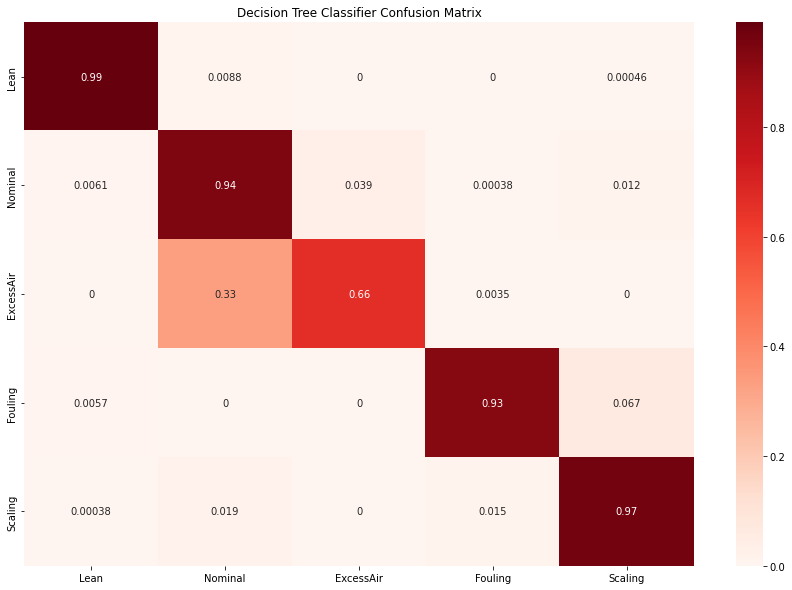

In [ ]:
cm_dtree = confusion_matrix(y_test, y_pred)

cmn = cm_dtree.astype('float') / cm_dtree.sum(axis=1)[:, np.newaxis]

x_axis_labels = ['Lean' ,'Nominal', 'ExcessAir' ,'Fouling' ,'Scaling'] # labels for x-axis
y_axis_labels = ['Lean' ,'Nominal', 'ExcessAir' ,'Fouling' ,'Scaling'] # labels for y-axis

plt.figure(figsize=(15,10))
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cmn,annot=True,cmap="Reds",cbar=True, annot_kws={"size": 10}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

##**6.1.3 Inter-Class Accuracy**

In [ ]:
classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_dtree[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

{'ExcessAir': 0.9758064516129032,
 'Fouling': 0.990347018572825,
 'Lean': 0.9951124144672532,
 'Nominal': 0.9616324535679375,
 'Scaling': 0.9808162267839687}

##**6.1.4 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.99      0.99      0.99      2151
     Fouling       0.94      0.94      0.94      2613
        Lean       0.65      0.66      0.66       287
     Nominal       0.92      0.93      0.93       526
     Scaling       0.97      0.97      0.97      2607

    accuracy                           0.95      8184
   macro avg       0.90      0.90      0.90      8184
weighted avg       0.95      0.95      0.95      8184



In [ ]:
y_test

2027     ExcessAir
26694      Nominal
4127     ExcessAir
18345      Scaling
18371      Scaling
           ...    
1430          Lean
8486     ExcessAir
4222     ExcessAir
18319      Scaling
5987     ExcessAir
Name: Class, Length: 8184, dtype: object

##**6.2 Via Random Forest Classifier**
###**Traget Varibale - Class**

##**6.2.1 Model Accuracy**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)
a_rf = accuracy_score(y_test, y_pred)
a_rf = round(a_rf*100,2)
print('Accuracy: %.3f' % a_rf)

Accuracy: 70.000


##**6.2.2 Inter-class Accuracy**

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred)

classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_rf[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

{'ExcessAir': 0.9611436950146628,
 'Fouling': 0.9672531769305963,
 'Lean': 0.9817937438905181,
 'Nominal': 0.8655913978494624,
 'Scaling': 0.876099706744868}

##**6.2.3 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.85      0.94      0.89      2151
     Fouling       0.61      0.64      0.63      2613
        Lean       0.27      0.24      0.26       287
     Nominal       0.63      0.57      0.60       526
     Scaling       0.72      0.64      0.68      2607

    accuracy                           0.70      8184
   macro avg       0.61      0.61      0.61      8184
weighted avg       0.70      0.70      0.70      8184



##**6.3 Via K-Nearest Neighbor Classifier**


##**6.3.1 Model Accuracy**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

a_knn = accuracy_score(y_test, y_pred)
a_knn = round(a_knn*100,2)
print('Accuracy: %.3f' % a_knn)

Accuracy: 54.860


##**6.3.2 Inter-class Accuracy**

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred)

classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_knn[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

{'ExcessAir': 0.9533235581622679,
 'Fouling': 0.9364613880742912,
 'Lean': 0.9874144672531769,
 'Nominal': 0.8087732160312805,
 'Scaling': 0.8145161290322581}

##**6.3.3 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.59      0.96      0.73      2151
     Fouling       0.52      0.46      0.49      2613
        Lean       0.07      0.02      0.03       287
     Nominal       0.12      0.09      0.10       526
     Scaling       0.64      0.44      0.52      2607

    accuracy                           0.55      8184
   macro avg       0.38      0.40      0.37      8184
weighted avg       0.53      0.55      0.52      8184



##**6.4 Via Extreme Gradient Boost (XGBoost) Classifier**

##**6.4.1 Model Accuracy**

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
a_xg = accuracy_score(y_test, y_pred)
a_xg = round(a_xg*100,2)
print('\nAccuracy : ', a_xg)


Accuracy :  68.33


##**6.4.2 Inter-class Accuracy**

In [ ]:
cm_xg = confusion_matrix(y_test, y_pred)

classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_xg[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

{'ExcessAir': 0.9538123167155426,
 'Fouling': 0.956256109481916,
 'Lean': 0.9958455522971652,
 'Nominal': 0.8930840664711632,
 'Scaling': 0.8361436950146628}

##**6.4.3 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.57      0.99      0.73      2151
     Fouling       0.68      0.73      0.70      2613
        Lean       0.56      0.03      0.07       287
     Nominal       0.91      0.40      0.55       526
     Scaling       0.95      0.51      0.67      2607

    accuracy                           0.68      8184
   macro avg       0.73      0.53      0.54      8184
weighted avg       0.75      0.68      0.66      8184



##**6.5 Via Standard Vector Machine (SVM) Classifier**

##**6.5.1 Model Accuracy**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc=SVC() 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
a_svm = accuracy_score(y_test, y_pred)
a_svm = round(a_svm*100,2)
print('Accuracy : {0:0.2f}'. format(a_svm))

Accuracy : 62.27


##**6.5.2 Inter-class Accuracy**

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred)

classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_svm[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

{'ExcessAir': 0.9525904203323559,
 'Fouling': 0.9710410557184751,
 'Lean': 0.9958455522971652,
 'Nominal': 0.8156158357771262,
 'Scaling': 0.8394428152492669}

##**6.5.3 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.65      0.99      0.78      2151
     Fouling       0.64      0.49      0.55      2613
        Lean       0.00      0.00      0.00       287
     Nominal       0.34      0.63      0.44       526
     Scaling       0.72      0.52      0.60      2607

    accuracy                           0.62      8184
   macro avg       0.47      0.53      0.47      8184
weighted avg       0.62      0.62      0.60      8184



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##**6.6 Via Auto Machine Learning**

In [ ]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
pip install scipy==1.7.0

In [ ]:
import scipy
print(scipy.__version__)

In [ ]:
import sklearn
import pandas as pd
import autosklearn.classification as classifier
from sklearn.model_selection import train_test_split 

##**6.6.1 Model Accuracy**

In [ ]:
automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=3600, per_run_time_limit=90)
automlclassifier.fit(X_train,y_train)

y_pred=automlclassifier.predict(X_test)

a_ml = accuracy_score(y_test, y_pred)
a_ml = round(a_ml*100,2)
print("Accuracy: ", a_ml)

# automlclassifier.show_models()

Process ForkProcess-1:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/util/logging_.py", line 320, in start_log_server
    receiver.serve_until_stopped()
  File "/usr/local/lib/python3.7/dist-packages/autosklearn/util/logging_.py", line 352, in serve_until_stopped
    self.timeout)
KeyboardInterrupt


In [ ]:
automlclassifier.show_models()

In [ ]:
cm_dtree = confusion_matrix(y_test, y_pred)

cmn = cm_dtree.astype('float') / cm_dtree.sum(axis=1)[:, np.newaxis]

x_axis_labels = ['Lean' ,'Nominal', 'ExcessAir' ,'Fouling' ,'Scaling'] # labels for x-axis
y_axis_labels = ['Lean' ,'Nominal', 'ExcessAir' ,'Fouling' ,'Scaling'] # labels for y-axis

plt.figure(figsize=(15,10))
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cmn,annot=True,cmap="Reds",cbar=True, annot_kws={"size": 10}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

##**6.6.2 Inter-class Accuracy**

In [ ]:
cm_ml = confusion_matrix(y_test, y_pred)

classes = ['Lean', 'Nominal' ,'ExcessAir', 'Fouling' ,'Scaling']

# We will store the results in a dictionary for easy access later
per_class_accuracies = {}

# Calculate the accuracy for each one of our classes
for idx, cls in enumerate(classes):
    # True negatives are all the samples that are not our current GT class (not the current row) 
    # and were not predicted as the current class (not the current column)
    true_negatives = np.sum(np.delete(np.delete(cm_dtree, idx, axis=0), idx, axis=1))
    
    # True positives are all the samples of our current GT class that were predicted as such
    true_positives = cm_ml[idx, idx]
    
    # The accuracy for the current class is ratio between correct predictions to all predictions
    per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm_dtree)

per_class_accuracies

##**6.6.3 Classification Report**

In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

#**7. Model Training and Classification**
##**Target Variable: Condition**

In [ ]:
#split dataset in features and target variable
features = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X = df[features] # Features
y = df.Condition # Target variable


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\n")


In [ ]:
cm_dtree = confusion_matrix(y_test, y_pred)

cmn = cm_dtree.astype('float') / cm_dtree.sum(axis=1)[:, np.newaxis]

x_axis_labels = ['%=0.05', '%=0.1',	'%=0.15',	'%=0.20',	'%=0.25',	'%=0.3',	'%=0.35',	
                 '%=0.40',	'%=0.45',	'%=0.50',	'F = 0.01',	'F = 0.06',	'F = 0.11',	'F = 0.16',	'F = 0.21',
                 'F = 0.26',	'F = 0.31',	'F = 0.36',	'F = 0.41',	'F = 0.46',	'Nominal',	'S = 0.01',	'S = 0.06',	
                 'S = 0.11',	'S = 0.16',	'S = 0.21',	'S = 0.26',	'S = 0.31',	'S = 0.36',	'S = 0.41',	'S = 0.46'] # labels for x-axis
y_axis_labels =['%=0.05', '%=0.1',	'%=0.15',	'%=0.20',	'%=0.25',	'%=0.3',	'%=0.35',	
                 '%=0.40',	'%=0.45',	'%=0.50',	'F = 0.01',	'F = 0.06',	'F = 0.11',	'F = 0.16',	'F = 0.21',
                 'F = 0.26',	'F = 0.31',	'F = 0.36',	'F = 0.41',	'F = 0.46',	'Nominal',	'S = 0.01',	'S = 0.06',	
                 'S = 0.11',	'S = 0.16',	'S = 0.21',	'S = 0.26',	'S = 0.31',	'S = 0.36',	'S = 0.41',	'S = 0.46'] # labels for y-axis

plt.figure(figsize=(20,15))
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cmn,annot=True,cmap="Reds",cbar=True, annot_kws={"size": 10}, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.show()

#**8. Comparative Study of Classification Models**

In [ ]:

# importing library
import matplotlib.pyplot as plt
  
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
if __name__ == '__main__':

    x = ['Auto ML','Decision Tree',  'Random Forest' , 'XG Boost' , 'SVM', 'KNN']
    y = [a_ml, a_dtree, a_rf, a_xg, a_svm, a_knn]

    plt.figure(figsize=(15,10))  
    plt.bar(x, y, color=['orange', 'blue', 'red', 'purple', 'green', 'brown']) 
    addlabels(x, y)
      
    plt.title("Comparison of Accuracies for Classification Models")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.show()

#**9. Feature Selection**

##**Impact of features on `ExcessAir`**

In [ ]:
#split dataset in features and target variable
f_e = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X_e = df_pre_1[f_e] # Features
y_e = df_pre_1.ExcessAir # Target variable


# Split dataset into training set and test set
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e, test_size=0.3, random_state=1) # 70% training and 30% test


automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=100, per_run_time_limit=30)
automlclassifier.fit(X_train_e,y_train_e)

y_pred_e=automlclassifier.predict(X_test_e)

print("Accuracy:",metrics.accuracy_score(y_test_e, y_pred_e))
print("\n")

plt.figure(figsize = (15,8))
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Impact of features on 'Excess Air' ")
plt.xlabel("Features")
plt.ylabel("Impact Score")
plt.show()

##**Impact of features on `Fouling`**

In [ ]:
#split dataset in features and target variable
f_f = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X_f = df_pre_1[f_f] # Features
y_f = df_pre_1.Fouling # Target variable


# Split dataset into training set and test set
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.3, random_state=1) # 70% training and 30% test


automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=100, per_run_time_limit=30)
automlclassifier.fit(X_train_f,y_train_f)

y_pred_f=automlclassifier.predict(X_test_f)

print("Accuracy:",metrics.accuracy_score(y_test_f, y_pred_f))
print("\n")


plt.figure(figsize = (15,8))
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Impact of features on 'Fouling' ")
plt.xlabel("Features")
plt.ylabel("Impact Score")
plt.show()

##**Impact of features on `Scaling`**

In [ ]:
#split dataset in features and target variable
f_s = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X_s = df_pre_1[f_s] # Features
y_s = df_pre_1.Scaling # Target variable


# Split dataset into training set and test set
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.3, random_state=1) # 70% training and 30% test


automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=100, per_run_time_limit=30)
automlclassifier.fit(X_train_s,y_train_s)

y_pred_s=automlclassifier.predict(X_test_s)

print("Accuracy:",metrics.accuracy_score(y_test_s, y_pred_s))
print("\n")


plt.figure(figsize = (15,8))
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Impact of features on 'Scaling' ")
plt.xlabel("Features")
plt.ylabel("Impact Score")
plt.show()

##**Impact of features on `Lean`**

In [ ]:
#split dataset in features and target variable
f_l = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X_l = df_pre_1[f_l] # Features
y_l = df_pre_1.Lean # Target variable


# Split dataset into training set and test set
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_l, y_l, test_size=0.3, random_state=1) # 70% training and 30% test


automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=100, per_run_time_limit=30)
automlclassifier.fit(X_train_l,y_train_l)

y_pred_l=automlclassifier.predict(X_test_l)

print("Accuracy:",metrics.accuracy_score(y_test_l, y_pred_l))
print("\n")


plt.figure(figsize = (15,8))
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Impact of features on 'Lean' ")
plt.xlabel("Features")
plt.ylabel("Impact Score")
plt.show()

##**Impact of features on `Nominal`**

In [ ]:
#split dataset in features and target variable
f_n = ["Fuel_Mdot","Tair","Treturn","Tsupply","Water_Mdot"]
X_n = df_pre_1[f_n] # Features
y_n = df_pre_1.Nominal # Target variable


# Split dataset into training set and test set
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_n, y_n, test_size=0.3, random_state=1) # 70% training and 30% test


automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=100, per_run_time_limit=30)
automlclassifier.fit(X_train_n,y_train_n)

y_pred_n=automlclassifier.predict(X_test_n)

print("Accuracy:",metrics.accuracy_score(y_test_n, y_pred_n))
print("\n")


plt.figure(figsize = (15,8))
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Impact of features on 'Nominal' ")
plt.xlabel("Features")
plt.ylabel("Impact Score")
plt.show()

#**10. Effect on Accuracy after Feature Selection**

##**10.1 Through Decision Tree Classifier**

In [ ]:
#split dataset in features and target variable
feature_cols = ["Fuel_Mdot","Tair","Tsupply","Water_Mdot"]
X = df[feature_cols] # Features
y = df.Class # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

a_dtree1 = metrics.accuracy_score(y_test, y_pred)
a_dtree1 = round(a_dtree1*100,2)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", a_dtree1)

Accuracy: 95.33


##**10.2 Through Auto ML**

In [ ]:
automlclassifier = classifier.AutoSklearnClassifier(time_left_for_this_task=1800, per_run_time_limit=90)
automlclassifier.fit(X_train,y_train)

y_pred=automlclassifier.predict(X_test)

a_ml1 = accuracy_score(y_test, y_pred)
a_ml1 = round(a_ml1*100,2)
print("Accuracy: ", a_ml1)

Accuracy:  95.67


In [ ]:
print(metrics.classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

   ExcessAir       0.99      1.00      1.00      2151
     Fouling       0.93      0.96      0.94      2613
        Lean       0.56      0.43      0.48       287
     Nominal       0.94      0.95      0.94       526
     Scaling       0.99      0.98      0.99      2607

    accuracy                           0.96      8184
   macro avg       0.88      0.86      0.87      8184
weighted avg       0.95      0.96      0.95      8184



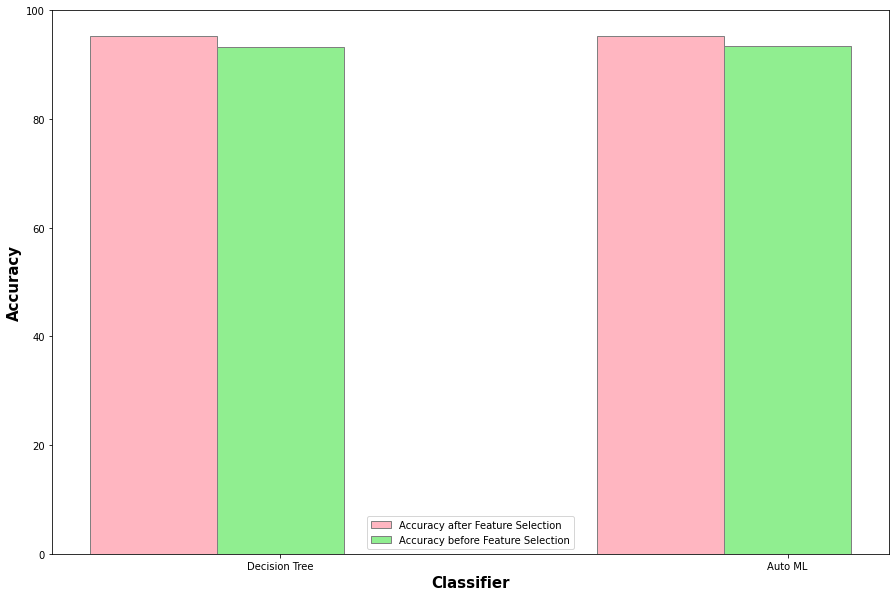

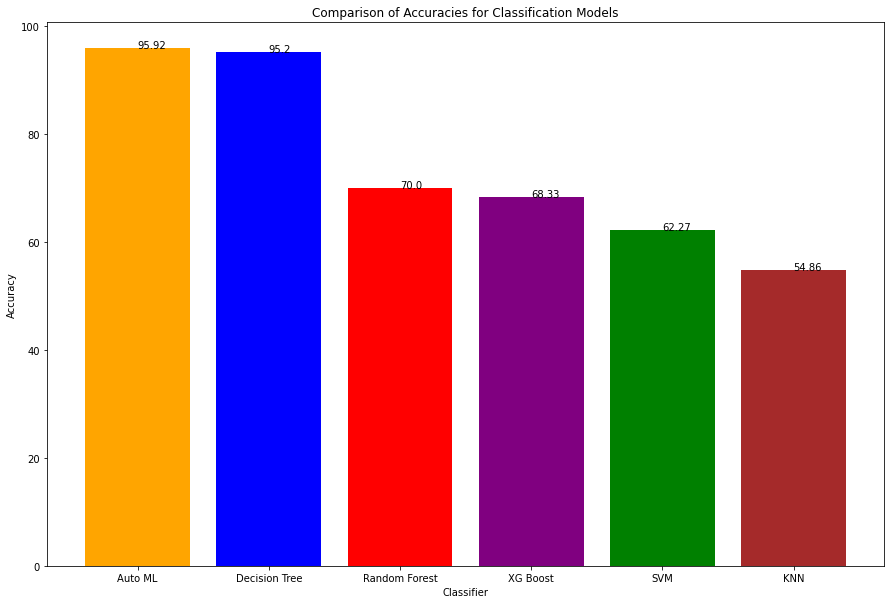

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(15, 10))
 
# set height of bar
Decision_Tree = [95.21,95.25]
Auto_ml = [93.28, 93.43]

# Set position of bar on X axis
br1 = np.arange(len(Auto_ml))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Decision_Tree, color ='lightpink', width = barWidth,
        edgecolor ='grey', label ='Accuracy after Feature Selection')
plt.bar(br2, Auto_ml, color ='lightgreen', width = barWidth,
        edgecolor ='grey', label ='Accuracy before Feature Selection')

 
# Adding Xticks
plt.xlabel('Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Auto_ml))],
        ['Decision Tree',"Auto ML"])
 
plt.legend()
plt.show()
 

  
if __name__ == '__main__':

    x = ['Auto ML','Decision Tree',  'Random Forest' , 'XG Boost' , 'SVM', 'KNN']
    y = [a_ml, a_dtree, a_rf, a_xg, a_svm, a_knn]

    plt.figure(figsize=(15,10))  
    plt.bar(x, y, color=['orange', 'blue', 'red', 'purple', 'green', 'brown']) 
    addlabels(x, y)
      
    plt.title("Comparison of Accuracies for Classification Models")
    plt.xlabel("Classifier")
    plt.ylabel("Accuracy")
    plt.show()

#**11. Handling Imbalance Data using SMOTE**

#**12. Generating Alert Messages**

In [ ]:
# pr=['F = 0.21']

pr = clf.predict([['4'	,'297',	'333.0000002',	'335.25235',	'9']])
# pr = clf.predict([['1',	'283'	,'333.0000002',	'342.3244007'	,'9.5']])

if (pr[0][0] == '%'):
  if (pr[0][2:]=='0.1'):
    print("Boiler operating at Nominal Condition")
  elif (pr[0][2:]<'0.1'):
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Lean Condition")
  else:
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Excess Air")

elif (pr[0][0] == 'F'):
  print("Boiler has", float(pr[0][4:])*100, "% of Fouling")
else:
  print("Boiler has", float(pr[0][4:])*100, "% of Scaling")

In [ ]:


pr = clf.predict([['1',	'283'	,'333.0000002',	'342.3244007'	,'9.5']])

if (pr[0][0] == '%'):
  if (pr[0][2:]=='0.1'):
    print("Boiler operating at Nominal Condition")
  elif (pr[0][2:]<'0.1'):
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Lean Condition")
  else:
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Excess Air")

elif (pr[0][0] == 'F'):
  print("Boiler has", float(pr[0][4:])*100, "% of Fouling")
else:
  print("Boiler has", float(pr[0][4:])*100, "% of Scaling")

In [ ]:
pr = clf.predict([['1','283','333','356.3152528','3.5']])

if (pr[0][0] == '%'):
  if (pr[0][2:]=='0.1'):
    print("Boiler operating at Nominal Condition")
  elif (pr[0][2:]<'0.1'):
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Lean Condition")
  else:
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Excess Air")

elif (pr[0][0] == 'F'):
  print("Boiler has", float(pr[0][4:])*100, "% of Fouling")
else:
  print("Boiler has", float(pr[0][4:])*100, "% of Scaling")

In [ ]:
pr = clf.predict([['1','283','333','359.2389633','3.5']])

if (pr[0][0] == '%'):
  if (pr[0][2:]=='0.1'):
    print("Boiler operating at Nominal Condition")
  elif (pr[0][2:]<'0.1'):
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Lean Condition")
  else:
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Excess Air")

elif (pr[0][0] == 'F'):
  print("Boiler has", float(pr[0][4:])*100, "% of Fouling")
else:
  print("Boiler has", float(pr[0][4:])*100, "% of Scaling")

In [ ]:
pr = clf.predict([['1','287','333.0000001','337.9953434','8']])

if (pr[0][0] == '%'):
  if (pr[0][2:]=='0.1'):
    print("Boiler operating at Nominal Condition")
  elif (pr[0][2:]<'0.1'):
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Lean Condition")
  else:
    print("Boiler operating at ", float(pr[0][2:])*100 , " % Excess Air")

elif (pr[0][0] == 'F'):
  print("Boiler has", float(pr[0][4:])*100, "% of Fouling")
else:
  print("Boiler has", float(pr[0][4:])*100, "% of Scaling")

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
#split dataset in features and target variable
feature_cols = ["Fuel_Mdot","Tair","Tsupply","Water_Mdot"]
X1 = df[feature_cols] # Features
y1 = df.Class # Target variable

X_train, X_test_temp, y_train, y_test_temp = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_temp, y_test_temp, test_size = 0.5, random_state = 0)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

Before OverSampling, counts of label '4': 0
Before OverSampling, counts of label '3': 0
Before OverSampling, counts of label '2': 0 

Before OverSampling, counts of label '1': 0
Before OverSampling, counts of label '0': 0 



In [ ]:
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res == 4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '4': 0
After OverSampling, counts of label '3': 0
After OverSampling, counts of label '2': 0
After OverSampling, counts of label '1': 0
After OverSampling, counts of label '0': 0


In [ ]:
import autosklearn.classification
#from autosklearn.metrics import mean_absolute_error as auto_mean_absolute_error
model = autosklearn.classification.AutoSklearnClassifier()
model.fit(X_train_res, y_train_res)
y_pred_t = model.predict(X_test, y_test)

In [ ]:
print(model.sprint_statistics())

auto-sklearn results:
  Dataset name: e28be3f4-7ac0-11ec-82e9-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.960008
  Number of target algorithm runs: 164
  Number of successful target algorithm runs: 103
  Number of crashed target algorithm runs: 25
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 35



In [ ]:
print(model.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
87           1             0.12  gradient_boosting  0.039992  34.772735
104          2             0.02  gradient_boosting  0.040188  31.326521
96           3             0.04  gradient_boosting  0.040384  22.595820
78           4             0.02  gradient_boosting  0.040678  25.190606
125          5             0.08  gradient_boosting  0.041658  32.728557
119          6             0.06  gradient_boosting  0.042149  30.150425
144          7             0.02  gradient_boosting  0.042443  26.415137
112          8             0.04  gradient_boosting  0.042737  26.259502
91           9             0.12  gradient_boosting  0.043521  11.668589
133         10             0.04  gradient_boosting  0.044207  24.450467
150         11             0.02  gradient_boosting  0.045187  11.139479
100         12             0.02  gradient_boosting  0.045677  23

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred_t)
print(acc)

0.9535679374389052


In [ ]:
y_pred_v = model.predict(X_valid, y_valid)
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_valid, y_pred_v) 
print(acc1)

0.9543010752688172


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_t, digits=4))

              precision    recall  f1-score   support

   ExcessAir     0.9924    0.9990    0.9957      1043
     Fouling     0.9742    0.9279    0.9505      1303
        Lean     0.5404    0.7436    0.6259       117
     Nominal     0.8147    0.9685    0.8850       286
     Scaling     0.9900    0.9583    0.9739      1343

    accuracy                         0.9536      4092
   macro avg     0.8623    0.9195    0.8862      4092
weighted avg     0.9605    0.9536    0.9558      4092

